#차원 축소(Dimensionality Reduction)
---
차원 축소는 비지도 학습 중 하나이다. 모델의 특성이 많으면 성능이 높아지고 훈련 데이터에 쉽게 과대적합된다. 차원 축소는 데이터를 가장 잘 나타내는 일부 특성을 선책하여 데이터 크기를 줄이고 지도 학습 모델의 성능을 향상시킬 수 있는 방법이다. 게다가 줄어든 차원에서 다시 원본 차원으로 손실을 최대한 줄이면서 복원할 수도 있다. 차원 축소 알고리즘의 대표적인 예로는 **주성분 분석(Principal Component Analysis)**가 있다.

In [ ]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

import numpy as np
from sklearn.decomposition import PCA

fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

pca = PCA(n_components = 50)
pca.fit(fruits_2d)
print(pca.components_.shape)

--2021-06-29 08:16:45--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2021-06-29 08:16:45--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2021-06-29 08:16:45--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... conne

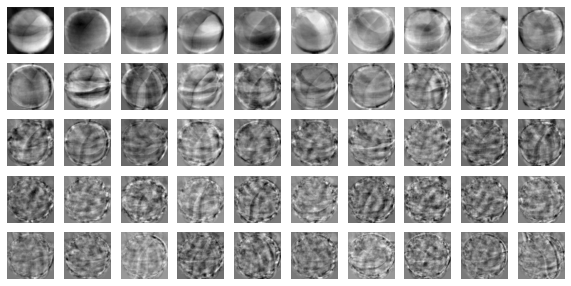

In [ ]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio = 1):
  n = len(arr)
  rows = int(np.ceil(n/10)) # 한 줄에 10개씩
  cols = n if rows < 2 else 10
  fig, axs = plt.subplots(rows, cols, figsize = (cols*ratio, rows*ratio), squeeze = False)

  for i in range(rows):
    for j in range(cols):
      if i * 10 + j < n:
        axs[i, j].imshow(arr[i*10 + j], cmap = 'gray_r')
      axs[i, j].axis('off')
  plt.show()

draw_fruits(pca.components_.reshape(-1, 100, 100))

In [ ]:
print(fruits_2d.shape)

fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape) # 50개의 주성분을 찾은 PCA 모델을 통해 데이터를 줄이기

(300, 10000)
(300, 50)


In [ ]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape) # 50개의 차원을 다시 복원

(300, 10000)


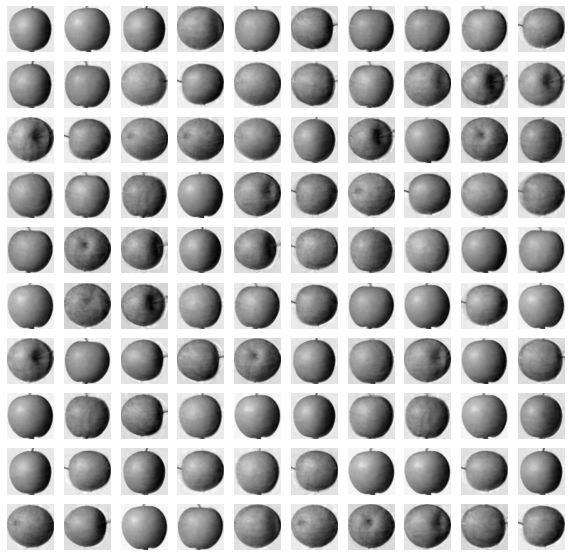

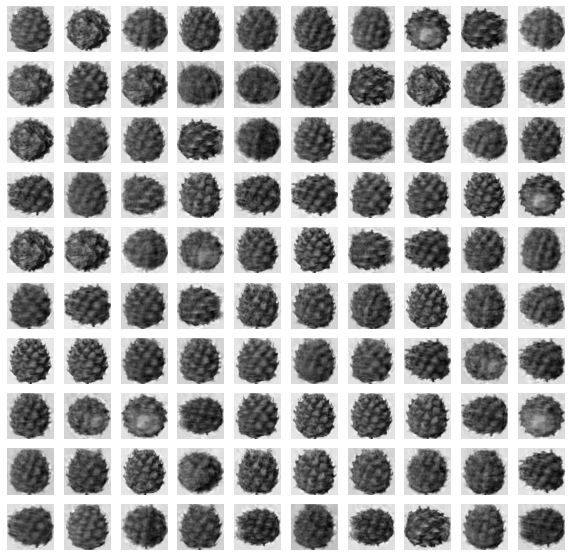

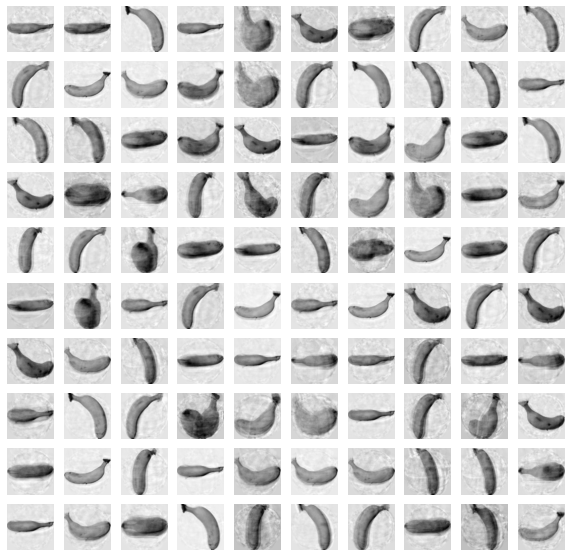

In [ ]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
for start in [0, 100, 200]:
  draw_fruits(fruits_reconstruct[start:start+100])
  print("\n")

주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값을 **설명된 분산(Explained Variance)**이라고 한다. PCA 클래스의 explained_variance_ratio_에 각 주성분의 설명된 분산 비율이 기록되어 있다. 이 분산 비율을 모두 더하면 50개의 주성분으로 표현하고 있는 총 분산 비율을 얻을 수 있다.

0.9215001716892866


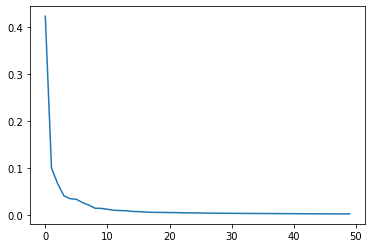

In [ ]:
print(np.sum(pca.explained_variance_ratio_))

plt.plot(pca.explained_variance_ratio_)
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

lr = LogisticRegression()
target = np.array([0]*100 + [1]*100 + [2]*100)

scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time'])) # 교차 검증 폴드의 훈련 시간

0.9966666666666667
1.4992309093475342


In [ ]:
scores = cross_validate(lr, fruits_pca, target) # PCA로 축소한 데이터를 사용했을 때
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.03209919929504394


50개의 특성만 사용했는데 정확도가 100%, 훈련 시간은 0.03초로 감소했다. PCA로 훈련 데이터의 차원을 축소하면 저장 공간뿐만 아니라 머신러닝 모델의 훈련 속도도 높일 수 있다.

In [ ]:
pca = PCA(n_components = 0.5) # 설명된 분산의 50%에 달하는 주성분을 찾도록 PCA 모델을 만들자
pca.fit(fruits_2d)

print(pca.n_components_) # 2개의 특성만으로 원본데이터에 있는 분산의 50%를 표현할 수 있다.

2


In [ ]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score'])) # 2개의 특성으로 99%의 정확도
print(np.mean(scores['fit_time']))

(300, 2)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


0.9933333333333334
0.053664207458496094


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
# 차원 축소된 데이터를 사용하여 k-평균 알고리즘으로 클러스터를 찾아보자.
from sklearn.cluster import KMeans

km = KMeans(n_clusters = 3, random_state = 42)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts = True))

(array([0, 1, 2], dtype=int32), array([ 91,  99, 110]))


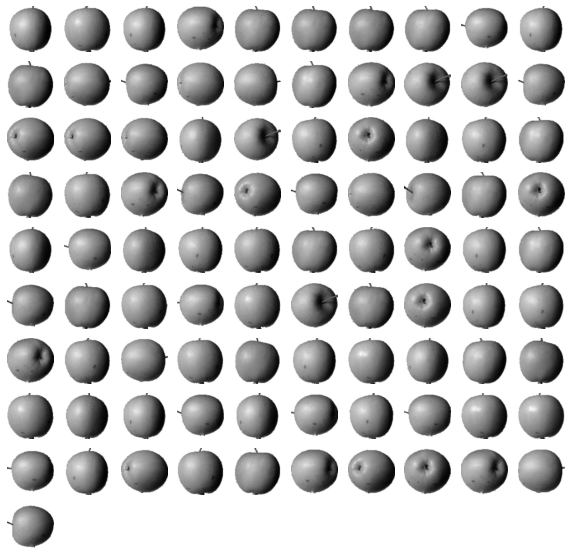

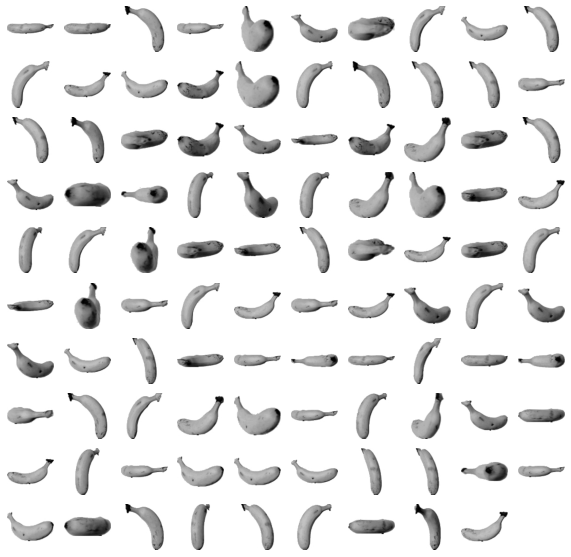

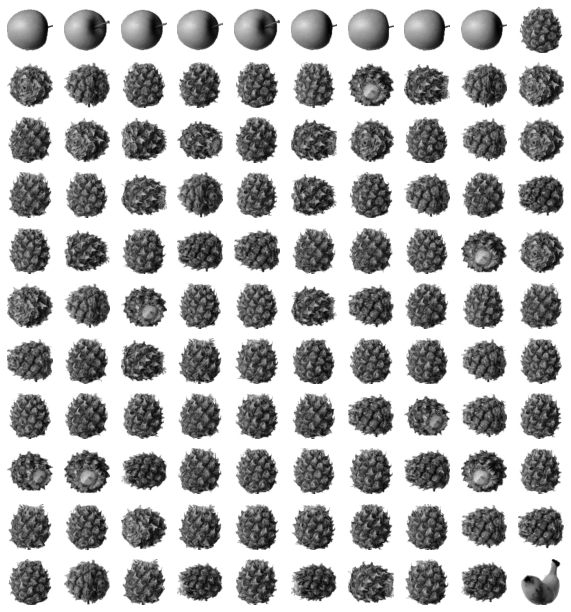

In [ ]:
for label in range(0, 3):
  draw_fruits(fruits[km.labels_ == label])
  print("\n")

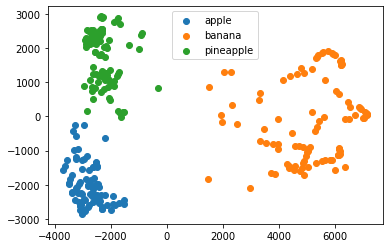

In [ ]:
# fruits_pca 데이터는 2개의 특성이 있기 떄문에 2차원으로 표현 가능
for label in range(0, 3):
  data = fruits_pca[km.labels_ == label]
  plt.scatter(data[:, 0], data[:, 1])
plt.legend(['apple', 'banana', 'pineapple'])
plt.show()